# 1: Regression

Sea Ice Extent area and Climate Change


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
%matplotlib inline 
#import pylatex
#import plotnine
#from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})


# Change the style of the plots 
plt.rc('text', usetex = True)
plt.rc('font', family = 'times')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

In [82]:
import matplotlib
matplotlib.use('PS')
matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=False
import pylab as pl
plt.switch_backend('PS')

string = r'z=${value}^{upper}_{lower}$'.format(
                value='{' + str(0.27) + '}',
                upper='{+' + str(0.01) + '}',
                lower='{-' + str(0.01) + '}')
print(string)

fig = plt.figure(figsize=(3,1))
fig.text(0.1,0.5,string,size=24,va='center')
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('issue5076.pdf')
pp.savefig(fig)
pp.close()

z=${0.27}^{+0.01}_{-0.01}$


<ipython-input-82-11d0978562d4>:4: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


<Figure size 216x72 with 0 Axes>

In [18]:
%matplotlib inline

## Simple and Multiple Linear Regression

The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly on the covariates (independent vaiables or predictors) $\textbf{x}_i$.

In the **simple** linear regression, with a single variable, we described the relationship between the predictor and the response with a straight line. The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

The parameter $a_0$ is called the constant term or the *intercept* and $a_1$ is called the coefficient.

In the case of *multiple* linear regression we extend this idea by fitting an m-dimensional hyperplane to our m predictors.

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} $$

The $a_i$ are termed the *parameters* of the model or the coefficients.


Let's generate a set of data to illsutrate simple linear regression

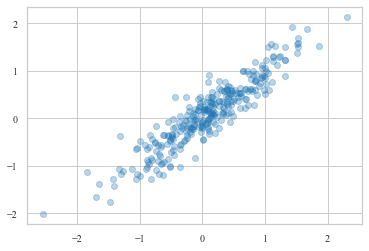

In [19]:
plt.rcParams.update({
    "font.family":'Times New Roman',
    "font.serif": [],                    # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"],  # use a specific sans-serif font
})
X1 = np.random.randn(300, 2)  # Random points sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]])
X2 = np.dot(X1, A)
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.3) # alpha, blending value, between 0 (transparent) and 1 (opaque).

We can create a linear model to explain the data

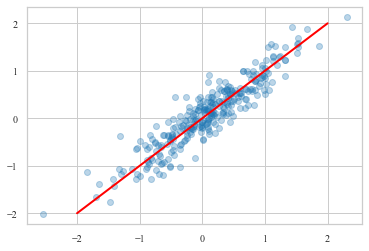

In [20]:
model = [0+1*x for x in np.arange(-2,3)]
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.3);
plt.plot(np.arange(-2,3), model, 'r');
plt.show()

# The red line gives the predicted values of this model

But there are other linear models. Which is the best model for a set of samples?

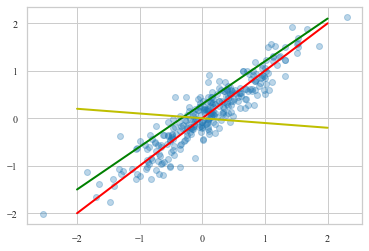

In [21]:
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.3);
# We can use several parameters and we do not know which is the best model
model1 = [0+1*x for x in np.arange(-2,3)]
model2 = [0.3+0.9*x for x in np.arange(-2,3)]
model3 = [0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1, 'r')
plt.plot(np.arange(-2,3), model2, 'g')
plt.plot(np.arange(-2,3), model3, 'y')
plt.savefig("chapter6.png", dpi = 300, bbox_inches = 'tight')
#add a path here yourself otherwise there will be an error stating "no such file or directory"

### Ordinary Least Squares

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the coefficients $a$'s 
of the simple linear regression: $\textbf{y} = a_0+a_1 \textbf{x}$, 
are chosen to minimize the **square of the distance between the predicted values and the actual values**. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ with respect to $a_0, a_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.


In [22]:
# TODO: create a linear regression model using the method from the lecture by computing a0 and a1


In [23]:
import statsmodels.api as sm
x =  X2[:,0] 

y =  X2[:,1] 

model = sm.OLS(y,x)
results = model.fit()
results.params


array([0.93428668])

In [24]:
results.tvalues #

array([42.64074199])

In [25]:
# TODO: create a linear regression model using Python Scikit-learn libraray and 
# print the intercept (a0) and the coefficient (a1)
# Compare the values to values that you cound in the previos step 
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x.reshape(-1,1), y)
reg.score(x.reshape(-1,1), y)

0.856774738116038

In [26]:
reg.coef_

array([0.93000941])

In [27]:
reg.intercept_

0.02437538113230396

In [28]:
# Pllot the data with the two models found in the previous two steps



### Practical case: Climate Change and Sea Ice Extent

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements from the [National Snow & Ice Data Center](https://nsidc.org/data/seaice\_index/archives.html).

We perform the following processing steps:

We start by reading and cleaning the data. The file 'SeaIce.txt' is a ``Tab`` separated file containing:
    + Year:	4-digit year
    + mo:	1- or 2-digit month
    + data_type:	Input data set (Goddard/NRTSI-G)
    + region:	Hemisphere that this data covers (N: Northern; S: Southern)
    + extent:	Sea ice extent in millions of square km
    + area:	Sea ice area in millions of square km


In [29]:
# Load the data and show the info and contents:
ice = pd.read_csv('SeaIce.txt', delim_whitespace = True)
print( ('shape:'), ice.shape)
ice.head()

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


To compute the anomaly for a given interval of time, we can compute the mean for that interval of time (using the period 1981 through 2010 for  the mean extend), before data cleaning.


In [30]:
# Compute the means of the different numerical attributes. What did you found?
ice.mean() #it is not possible to have area with negative values

year      1996.000000
mo           6.500000
extent     -35.443066
area       -37.921108
dtype: float64

In [31]:
ice.area.sort_values()

9     -9999.00
397   -9999.00
315       2.15
280       2.56
310       2.78
        ...   
50       13.54
94       13.57
55       13.70
86       13.71
81       13.84
Name: area, Length: 424, dtype: float64

We need to **clean** the data.

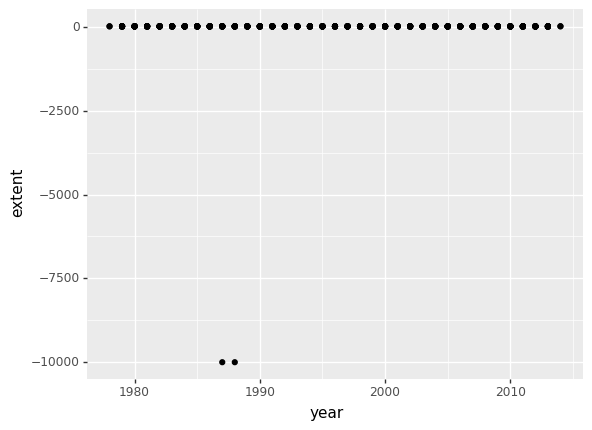

<ggplot: (104863402207)>

In [34]:
import plotnine
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# Visualize the 'year' in the x-axis and the 'extend' in the y-axis
(ggplot(ice)
 + aes(x='year', y="extent")
 + geom_point()
)

We detect some **outlier** or **missing** data.

C:\Users\hansf\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


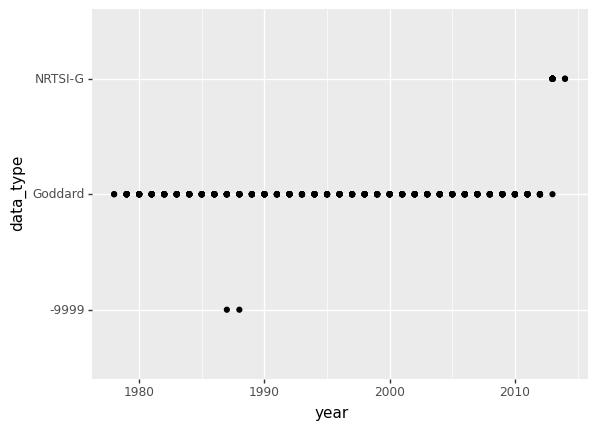

<ggplot: (104863432033)>

In [35]:
# TODO: print the different values in the field data_type of the ice dataset
(ggplot(ice)
 + aes(x='year', y="data_type")
 + geom_point()
)


In [36]:
# TODO: display the records that contains values different than Goddard and NRTSI-G in the data_type field
ice[ice['data_type'] == "-9999"]

,year,mo,data_type,region,extent,area
9,1988,1,-9999,N,-9999.0,-9999.0
397,1987,12,-9999,N,-9999.0,-9999.0


C:\Users\hansf\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


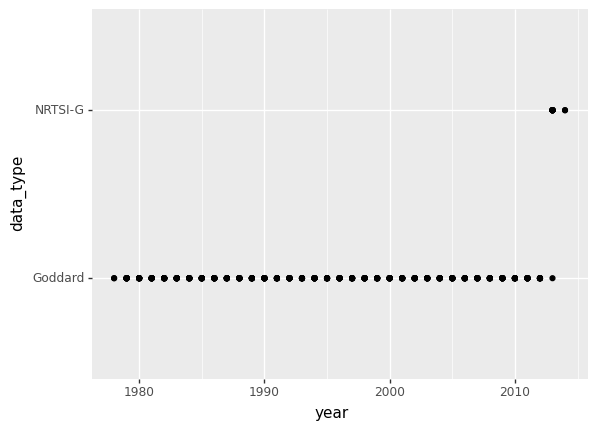

<ggplot: (104863413468)>

In [37]:
# TODO: We can easily clean the data bby deleting the records that contains -9999 in the data_type field
# display the number of remaining records and plot the year versus extent similar to what we did before

ice2 = ice[ice['data_type'] != "-9999"]

# And plot the data again
(ggplot(ice2)
 + aes(x='year', y="data_type")
 + geom_point()
)

To compute the tendency for a given interval of time (month), we need to normalize the data.

The ``lmplot()`` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas ``DataFrame``. To plot them, we provide the predictor and response variable names along with the dataset

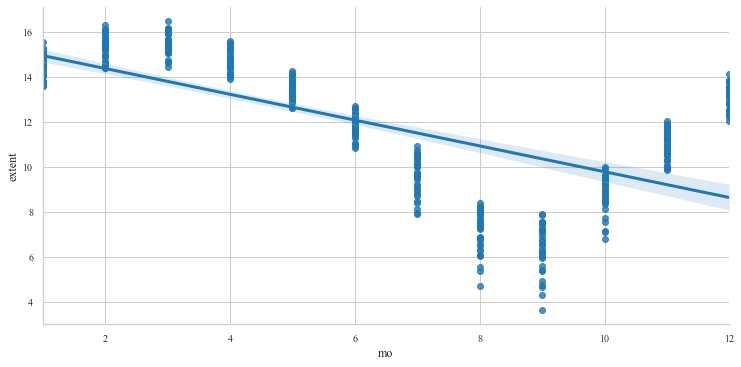

In [38]:
sns.lmplot(x = "mo", y = "extent", data = ice2, height = 5.2, aspect = 2);
plt.savefig("IceExtentCleanedByMonth.png", dpi = 300, bbox_inches = 'tight')

You can observe fluctuation in the data for the different months. This can be interpreted as seasonal effects.

In [39]:
# TODO: Compute the mean and the variance for each month over all the years to see the seasonal effects clearly.
months = ice2["year"].groupby(ice["mo"]).agg(["mean", "var"]).copy()
months

,mean,var
mo,,
1,1996.742857,112.078992
2,1996.500000,111.000000
3,1996.000000,105.000000
4,1996.000000,105.000000
5,1996.000000,105.000000
6,1996.000000,105.000000
7,1996.000000,105.000000
8,1996.000000,105.000000
9,1996.000000,105.000000


In [40]:
month_means = months["mean"].copy()
month_var = months["var"].copy()


To hide the seasonal effects, we can compute the mean for that interval of time (month) (using the period 1981 through 2010 for the mean extend) and we subtract it from the mean extend for that interval. This value must be converted to percent difference by dividing it by the 1981-2010 average and then multiplying by 100.

<ipython-input-41-bcf71c43423e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hansf\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-41-bcf71c43423e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hansf\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

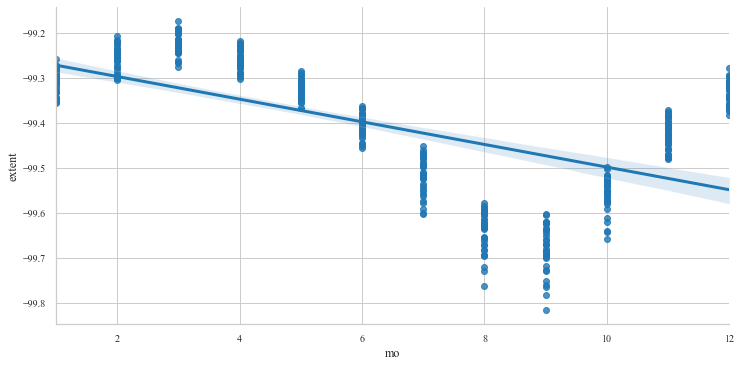

In [41]:
# Data normalization
for i in range(12):
    ice2.extent[ice2.mo == i+1] = 100*(ice2.extent[ice2.mo == i+1] - month_means[i+1])/month_means.mean()
    
sns.lmplot(x = "mo", y = "extent", data = ice2, height = 5.2, aspect = 2);
plt.savefig("IceExtentNormalizedByMonth.png", dpi = 300, bbox_inches = 'tight')

In [42]:
print( 'mean:', ice2.extent.mean())
print( 'var:', ice2.extent.var())

mean: -99.40994308937292
var: 0.023045854584234995


Let us consider the entiere year

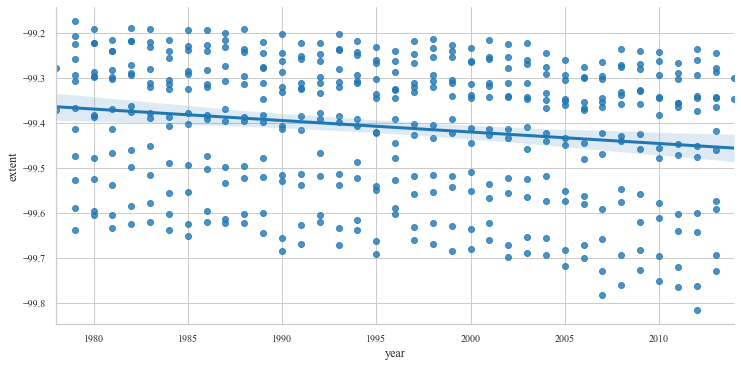

In [43]:
sns.lmplot(x = "year", y = "extent", data = ice2, height = 5.2, aspect = 2);
plt.savefig("IceExtentAllMonthsByYearlmplot.png", dpi = 300, bbox_inches = 'tight')

<ipython-input-44-341cb6f4de88>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


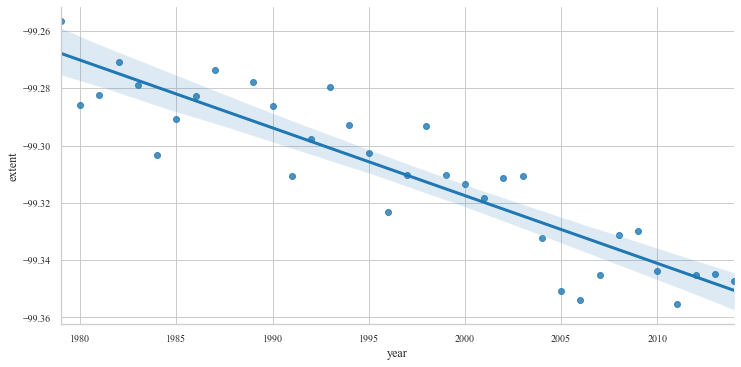

In [44]:
# TODO: Plot the relation for January
sns.lmplot(x = "year", y = "extent", data = ice2[ice["mo"]==1 ], height = 5.2, aspect = 2);
plt.savefig("IceExtentAllMonthsByYearlmplot.png", dpi = 300, bbox_inches = 'tight')

<ipython-input-45-fc1a692a41d4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


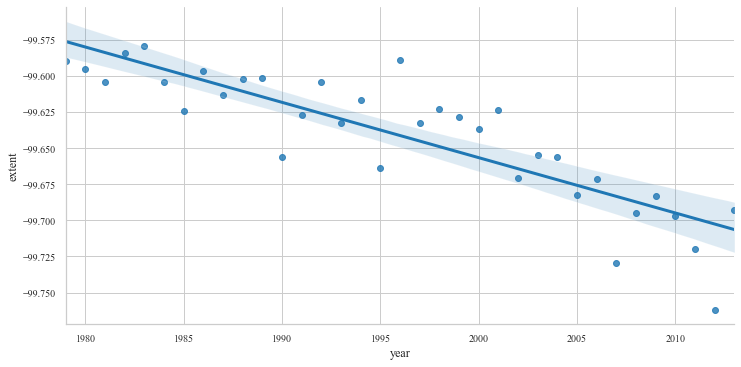

In [45]:
# TODO: Plot the relation for August
sns.lmplot(x = "year", y = "extent", data = ice2[ice["mo"]==8 ], height = 5.2, aspect = 2);
plt.savefig("IceExtentAllMonthsByYearlmplot.png", dpi = 300, bbox_inches = 'tight')

We will use **Scikit-learn**, library that provides a variety of both supervised and unsupervised machine learning techniques.
Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. 
The <code>Estimator.fit</code> method sets the state of the estimator based on the training data. Usually, the data is comprised of a two-dimensional numpy array $X$ of shape <code>(n_samples, n_predictors)</code> that holds the so-called feature matrix and a one-dimensional numpy array $\textbf{y}$ that holds the responses. Some estimators allow the user to control the fitting behavior. 
For example, the <code>sklearn.linear_model.LinearRegression</code> estimator allows the user to specify whether or not to fit an intercept term. This is done by setting the corresponding constructor arguments of the estimator object.
During the fitting process, the state of the estimator is stored in instance attributes that have a trailing underscore ('_'). For example, the coefficients of a LinearRegression estimator are stored in the attribute coef_.

Estimators that can generate predictions provide a ``Estimator.predict`` method. 
In the case of regression, ``Estimator.predict`` will return the predicted regression values, $\hat{\textbf{y}}$. 

In [46]:
# TODO: create a LinearRegression model and fit the model with the data of the year (independent variable) and the extent (response)

#Picking only X = year, and y=extent
X = ice2["year"].values.reshape(-1,1)
y = ice2["extent"]

#Creating the regressor object 
reg = LinearRegression()

#Fitting the model
model = reg.fit(X,y)



In [47]:
#lookinf for coef and intercept
print("Coef", model.coef_, "Intercept", model.intercept_)

Coef [-0.00255864] Intercept -94.30279070169189


We can evaluate the model fitting by computing the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model.
The coefficient $R^2$ is defined as $(1 - \textbf{u}/\textbf{v})$, where $\textbf{u}$ is the residual sum of squares $\sum (\textbf{y} - \hat{\textbf{y}})^2$ and $\textbf{v}$ is the regression sum of squares $\sum (\textbf{y} - \bar{\textbf{y}})^2$, where $\bar{\textbf{y}}$ is the mean.
The best possible score for $R^2$ is 1.0: lower values are worse.
These measures can provide a quantitative answer to the question we are facing: Is there a negative trend in the evolution of sea ice extent over recent years?

In [48]:
# TODO: Use the whole dataset for training (building the linear regression model) 
# and for testing (predicting the value of the extent for all the years).  Compute and print the sum squared error 
# and the R^2 metric.
# Analysis for all months together.
ice3 = ice2.copy()

#Picking only X = year, and y=extent
#we can`t build linear regression with categorical variables
#Convert to dummies variables
ice3 = pd.get_dummies(ice3)

X = ice3.drop(columns=['extent']).values
y = ice3["extent"]

#Creating the regressor object 
reg = LinearRegression()

#Fitting the model
model2 = reg.fit(X,y)

#lookinf for coef and intercept
print("Coef", model2.coef_, "Intercept", model2.intercept_)


Coef [-0.0016178   0.00191782  0.0478023  -0.00729155  0.00729155  0.        ] Intercept -96.63034875530039


In [49]:
#Creating a field pred to compare the predict value x original value
pred = model2.predict(X) #predict the model with the original values
ice3['pred'] = pred #create a new colum to compare

In [50]:
#showing final dataframe
ice3

,year,mo,extent,area,data_type_Goddard,data_type_NRTSI-G,region_N,pred
0,1979,1,-99.256647,12.33,1,0,1,-99.247948
1,1980,1,-99.285705,11.85,1,0,1,-99.272511
2,1981,1,-99.282198,11.82,1,0,1,-99.275563
3,1982,1,-99.270675,12.11,1,0,1,-99.263318
4,1983,1,-99.278691,11.92,1,0,1,-99.274018
...,...,...,...,...,...,...,...,...
419,2009,12,-99.358349,10.25,1,0,1,-99.374815
420,2010,12,-99.382897,10.08,1,0,1,-99.384559
421,2011,12,-99.363860,10.28,1,0,1,-99.376617
422,2012,12,-99.373879,10.11,1,0,1,-99.386361


In [51]:
#comparing the errors
from sklearn.metrics import mean_squared_error

y_true = ice3['extent']
y_pred = ice3['pred']

#Meand squared error
round(mean_squared_error(y_true, y_pred),6)


0.000559

In [52]:
#Looking for the R2 of the model
print("Model 2 => R2 ", round(model2.score(X,y),2)) 
print("Model 2 => R2 ", round(metrics.r2_score(y_true, y_pred),2))


Model 2 => R2  0.98
Model 2 => R2  0.98


We can conclude that the data show a long-term negative trend in recent years.


MSE: 0.00013352864104932107
R^2: 0.7810636041395674


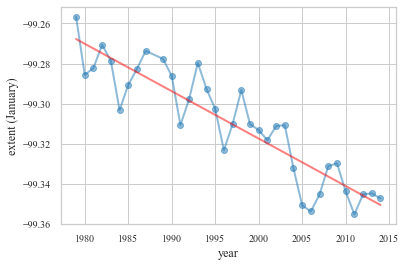

In [53]:
# Analysis for a particular month.
jan = ice3[ice3['mo'] == 1] #defining the variable that Hakim uses

x = jan[['year']]
y = jan[['extent']]

model = LinearRegression()
model.fit(x, y)

y_hat = model.predict(x)

plt.figure()
plt.plot(x, y,'-o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (January)')

print( "MSE:", metrics.mean_squared_error(y_hat, y))
print( "R^2:", metrics.r2_score(y_hat, y))

We can also estimate the extent value for 2025. For that we use the function predict of the model.

In [54]:

X = [[2025]]
y_hat = model.predict(X)
j = 1 # January
# Original value (before normalization)
y_hat = (y_hat*month_means.mean()/100) + month_means[j]
print("Prediction of extent for January 2025 (in millions of square km):", y_hat)

Prediction of extent for January 2025 (in millions of square km): [[13.14449923]]


## Polynomial Regression

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

A very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. 

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

The higher the order of the polynomial the more "wigglier" functions you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

### Housing Data

The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. We want to predict the price of a market given a set of attributes.



We start with loading and visualizing the data.

In [55]:
boston = datasets.load_boston()
X_boston, y_boston = boston.data, boston.target
print( 'Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [56]:
print( 'Keys:', boston.keys())
print( 'Feature names:',boston.feature_names)
print( boston.DESCR)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances 

Text(0, 0.5, 'count')

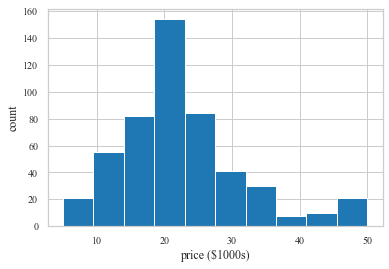

In [57]:
# Histogram of prices:
plt.hist(y_boston) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

### Visualizations

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".

Seaborn visualization can be used to show this linear relationships easily:

In [58]:
#transform to a dataframe
df_boston = datasets.load_boston()
df_boston = pd.DataFrame(df_boston.data, columns=df_boston.feature_names)
df_boston['PRICE'] = y_boston
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


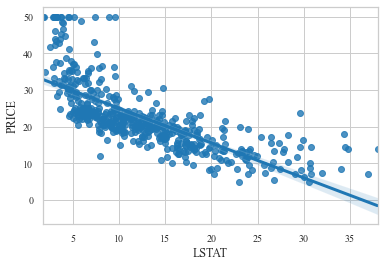

In [59]:
# TODO: Visualization of the relations between price and LSTAT
sns.regplot(df_boston['LSTAT'], df_boston['PRICE'])



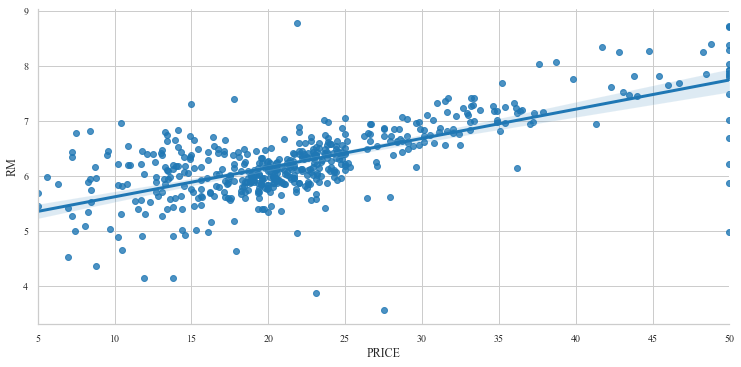

In [60]:
# Visualization of the relations between price and RM
sns.lmplot(x = "PRICE", y = "RM", data = df_boston, height = 5.2, aspect = 2)

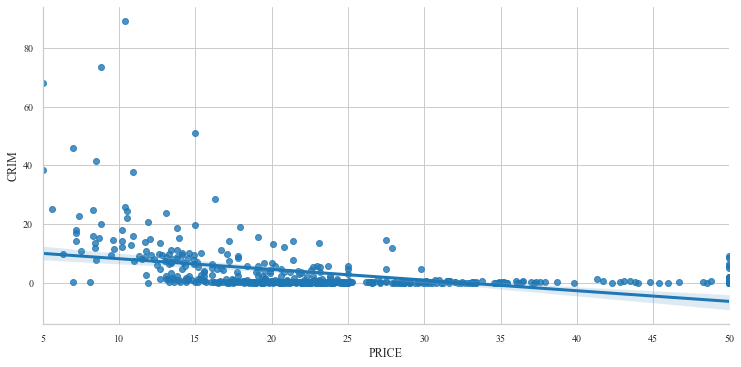

In [61]:
# Visualization of the relations between price and CRIM
sns.lmplot(x = "PRICE", y = "CRIM", data = df_boston, height = 5.2, aspect = 2)

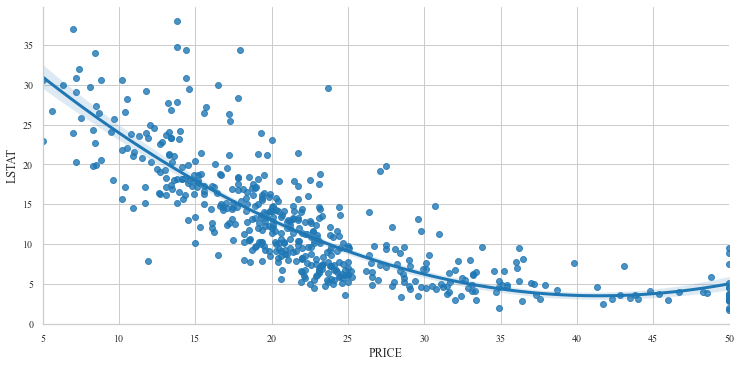

In [62]:
sns.lmplot(x = "PRICE", y = "LSTAT", data = df_boston, order = 2, height = 5.2, aspect = 2)
plt.savefig("lmplotBostonLSTAT_order2.png", dpi = 300, bbox_inches = 'tight')

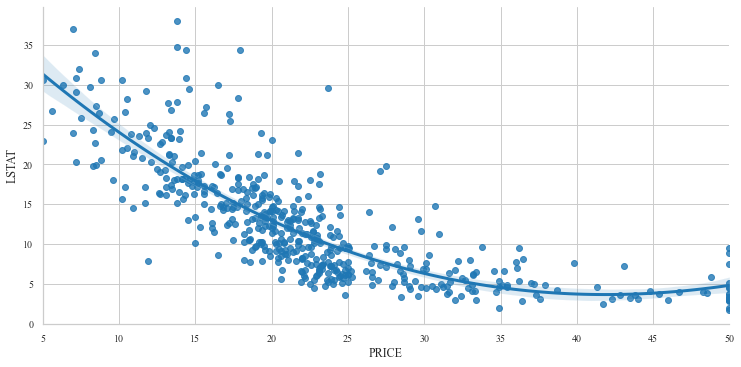

In [63]:
sns.lmplot(x = "PRICE", y = "LSTAT", data = df_boston, order = 3, height = 5.2, aspect = 2)
plt.savefig("lmplotBostonLSTATorder3.png", dpi = 300, bbox_inches = 'tight')

### Predictions

Let's make predictions. Evaluation on new samples using Scikit-learn.
We will split the data into training set and test set:

In [64]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [65]:
# TODO: Split the dataset into 75% for training and 25% for testing
# Build a regression model using the training data
# Use the model to compute the response for the test data
# Evaluate the model by printing the mean square error and the sum of square error when predicting the test data

#Defining X and y
X = df_boston.iloc[:,0:13].values #predictors
y = df_boston.iloc[:,-1].values #output


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [67]:
#Training the model using training values
reg = LinearRegression()
model3 = reg.fit(X_train, y_train)

#Predicting using test values

y_pred = model3.predict(X_test)

#Evaluating the model 

print("R2 on training set", model3.score(X_train, y_train))
print("R2 on Test set", metrics.r2_score(y_test, y_pred))
print("Mean Absolut Error on Test set", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error on Test set", metrics.mean_squared_error(y_test, y_pred))

R2 on training set 0.7480872598623441
R2 on Test set 0.6844267283527123
Mean Absolut Error on Test set 3.060939595437034
Mean Squared Error on Test set 22.098694827098036


We can see that all the coefficients obtained are different from zero, meaning that no variable is discarded.
Next, we try to build a sparse model to predict the price using the most important factors and discarding the non-informative ones. To do this, we can create a LASSO regressor, forcing zero coefficients.

In [68]:
from sklearn import linear_model

lasso = linear_model.Lasso()
model4 = lasso.fit(X_train, y_train)

#Predicting using test values
y_pred = model4.predict(X_test)

#Evaluating the model 
print("R2 on training set", model4.score(X_train, y_train))
print("R2 on Test set", metrics.r2_score(y_test, y_pred))
print("Mean Absolut Error on Test set", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error on Test set", metrics.mean_squared_error(y_test, y_pred))

R2 on training set 0.6948040743556284
R2 on Test set 0.6516957380017043
Mean Absolut Error on Test set 3.4246102430971086
Mean Squared Error on Test set 24.390752590355167


In [69]:
#Looking for coef if there is any 0
df_show = pd.DataFrame( model4.coef_, df_boston.iloc[:,0:13].columns)
df_show


,0
CRIM,-0.083898
ZN,0.026461
INDUS,-0.000000
CHAS,0.000000
NOX,-0.000000
RM,1.545450
AGE,0.013458
DIS,-0.582829
RAD,0.207381
TAX,-0.011213


# Classification

## Logistic Regresion (Scikit-learn)

**Logistic regression** or logit regression is a type of probabilistic statistical classification model. It is also used to predict a binary response from a binary predictor, used for predicting the outcome of a categorical dependent variable (i.e., a class label) based on one or more predictor variables (features). 

(Source: *Wikipedia*)

The logistic function is:

$$ f(x) = \frac{1}{1+e^{- \lambda x}}$$

The logistic function is useful because it can take an input with any value from negative infinity to positive infinity, whereas the output  is confined to values between 0 and 1 and hence is interpretable as a probability.

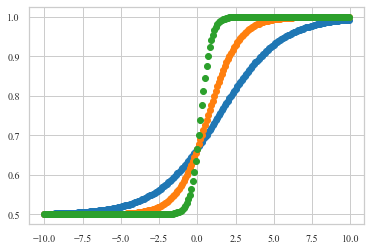

In [238]:
# TODO: Plot the shape of the logist function for three different values of lambda (0.5, 1, 3). 
# Note that small values for lambda makes the function almost linear
# Large values for lambda makes the function almost step function 

x = np.arange(-10.0,10.0,0.1)
loss1 = 1/(1 + expit(-x * 0.5 ))
loss2 = 1/(1 + expit(-x * 1 ))
loss3 = 1/(1 + expit(-x * 3 ))


plt.scatter(x=x, y=loss1)
plt.scatter(x=x, y=loss2)
plt.scatter(x=x, y=loss3)

Winning or Losing Football Team

We want to predict victory or defeat in a football match when we are given the number of goals a team scores.
To do this we consider the set of results of the football matches from the Spanish league and we build a classification model with it.

In [71]:
# Season 2012/2013
# TODO: Read this file in a pandas DataFrame: http://www.football-data.co.uk/mmz4281/1213/SP1.csv
# Select these columns in a new DataFrame: 'HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR'. 
# (FTHG: Home team goals, FTAG: Away team goals, FTR: H=Home Win, D=Draw, A=Away Win)
# Display the first 5 rows of the new dataframe

file = 'SP1.csv' # file = 'http://www.football-data.co.uk/mmz4281/1213/SP1.csv'
data_football = pd.read_csv(file)
s = data_football[['HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR']]

In [72]:
s.head() # (H=Home Win, D=Draw, A=Away Win)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Celta,Malaga,0,1,A
1,Mallorca,Espanol,2,1,H
2,Sevilla,Getafe,2,1,H
3,Ath Bilbao,Betis,3,5,A
4,Barcelona,Sociedad,5,1,H


Can we predict if we have a win or loss if we are given a score?

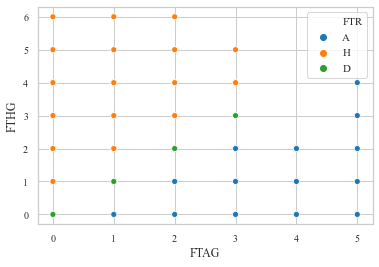

In [100]:
# TODO: Visualization with scatter the number of goals

sns.scatterplot(data=s, x="FTAG", y="FTHG", hue="FTR")

In [102]:
# TODO: Create two extra columns containing 'W' the number of goals of the winner and 'L' the number of goals of the loser

s['W'] = np.where(s['FTHG'] > s['FTAG'], s['FTHG'], s['FTAG'])
s['L'] = np.where(s['FTHG'] <= s['FTAG'], s['FTHG'], s['FTAG'])
s


<ipython-input-102-06612f27b9b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-102-06612f27b9b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,W,L
0,Celta,Malaga,0,1,A,1,0
1,Mallorca,Espanol,2,1,H,2,1
2,Sevilla,Getafe,2,1,H,2,1
3,Ath Bilbao,Betis,3,5,A,5,3
4,Barcelona,Sociedad,5,1,H,5,1
...,...,...,...,...,...,...,...
375,Mallorca,Valladolid,4,2,H,4,2
376,Real Madrid,Osasuna,4,2,H,4,2
377,Sevilla,Valencia,4,3,H,4,3
378,Vallecano,Ath Bilbao,2,2,D,2,2


In [103]:
s.info()
s.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  380 non-null    object
 1   AwayTeam  380 non-null    object
 2   FTHG      380 non-null    int64 
 3   FTAG      380 non-null    int64 
 4   FTR       380 non-null    object
 5   W         380 non-null    int64 
 6   L         380 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 20.9+ KB


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,W,L
0,Celta,Malaga,0,1,A,1,0
1,Mallorca,Espanol,2,1,H,2,1
2,Sevilla,Getafe,2,1,H,2,1
3,Ath Bilbao,Betis,3,5,A,5,3
4,Barcelona,Sociedad,5,1,H,5,1


In [104]:
# Create the data and target

x1 = s['W'].values 
y1 = np.ones(len(x1), dtype = np.int)
x2 = s['L'].values 
y2 = np.zeros(len(x2), dtype = np.int)

x = np.concatenate([x1, x2])
x = x[:, np.newaxis]
y = np.concatenate([y1, y2])

In [170]:
# Fitting of a Logistic Regression and prediction using the model:
# Built a X (1-d) predictor with all scores and a y binary variable indicating win or loss.
# Compute and visualize a logistic regression. 
# Which is the cut value?

from sklearn.linear_model import LogisticRegression

#initialize the model
log = LogisticRegression()

#fit the model
model_log = log.fit(x,y)

#Creating a df to visualise the results
df_results = pd.DataFrame(data=x, columns=['goals'])
df_results["win"] = y
df_results

#predicting
y_pred = model_log.predict(x)

df_results['pred_win'] = y_pred

#Putting the probabilities of win in df
prob_win = model_log.predict_proba(x)
df_results['prob_win'] = prob_win[:,1] #only pick first value = win
df_results


,goals,win,pred_win,prob_win
0,1,1,0,0.398034
1,2,1,1,0.713175
2,2,1,1,0.713175
3,5,1,1,0.992493
4,5,1,1,0.992493
...,...,...,...,...
755,2,0,1,0.713175
756,2,0,1,0.713175
757,3,0,1,0.903381
758,2,0,1,0.713175


In [175]:
#evaluating the model
model_log.score(y_pred.reshape(-1,1), y)

0.5

Text(0.5, 0, 'Goals')

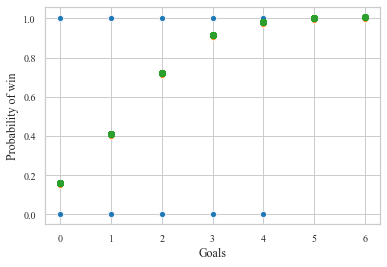

In [269]:
clf = model_log
clf.intercept_

loss2 = expit(df_results['goals'].values * clf.coef_ + clf.intercept_)

#or u can use y = prob_win
#y = df_results['prob_win']
x = df_results['goals'].values

sns.scatterplot(x="goals", y="win", sizes=(8), data=df_results)
sns.scatterplot(x="goals", y="prob_win", data=df_results)
plt.scatter(x=x, y=loss2+0.01, alpha=1) #not the same lines... just to compare
plt.ylabel('Probability of win')
plt.xlabel("Goals")

In [219]:
#show the same values as a table! Look that threshold if 2 goals = 70% probability of win!
df_results.groupby("goals").mean()

,win,pred_win,prob_win
goals,,,
0,0.123762,0.0,0.149544
1,0.418327,0.0,0.398034
2,0.739645,1.0,0.713175
3,0.844156,1.0,0.903381
4,0.973684,1.0,0.972345
5,1.000000,1.0,0.992493
6,1.000000,1.0,0.997993


With this information we can estimate that the cut off value is 1. This means that a team has to score more than one goal to win.

## KNN - Nearest Neighbors Classification

In [78]:
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
n_neighbors = 25

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

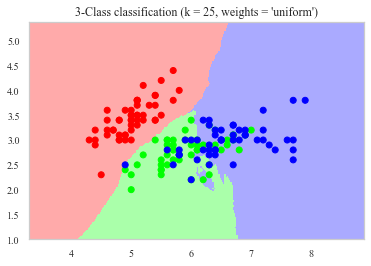

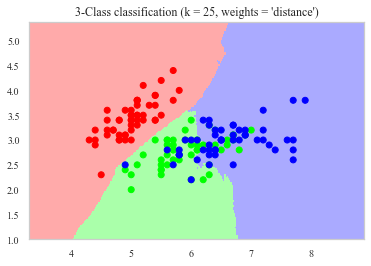

In [79]:


for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax.pcolormesh(xx, yy, Z, shading = 'auto', cmap=cmap_light)

    # Plot also the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
             % (n_neighbors, weights))

## Decision Trees

We will use the iris dataset

In [80]:
# Load data
iris = datasets.load_iris()

<ipython-input-83-c9bdb3f2e273>:56: UserWarning: Matplotlib is currently using ps, which is a non-GUI backend, so cannot show the figure.


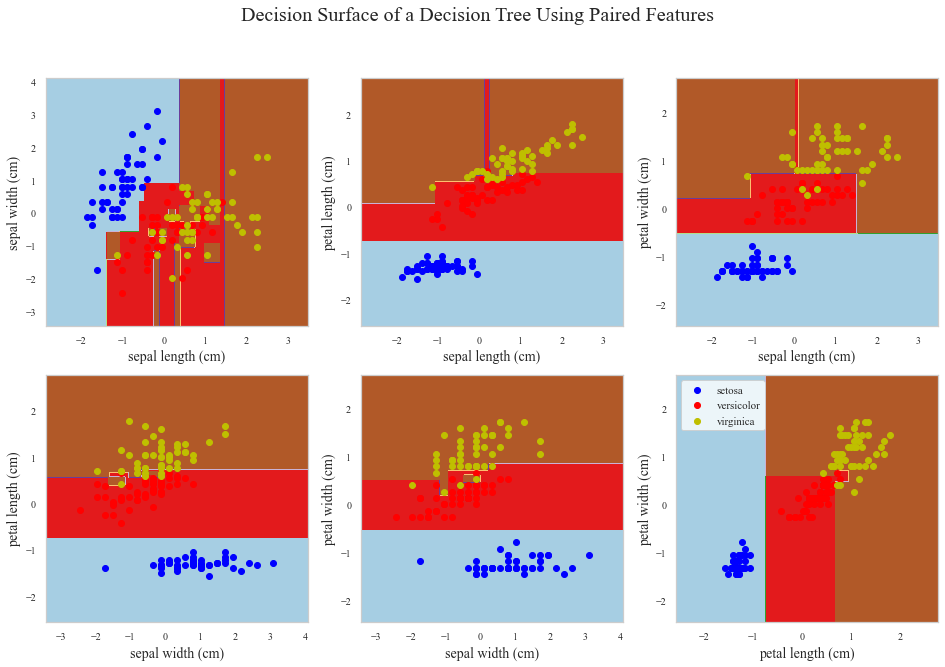

In [83]:
# Use all the combinations of two attributes to train the decision tree classifier 
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

figure = pl.figure(figsize=(16, 10))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
     # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    pl.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = pl.contourf(xx, yy, Z, cmap=pl.cm.Paired)

    pl.xlabel(iris.feature_names[pair[0]], fontsize=14)
    pl.ylabel(iris.feature_names[pair[1]], fontsize=14)
    pl.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        pl.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                   cmap=pl.cm.Paired)

    pl.axis("tight")

pl.suptitle("Decision Surface of a Decision Tree Using Paired Features", fontsize=20)
pl.legend()
pl.show()

In [244]:
# TODO: Split the dataset into 75% for training and 25% for testing 
# Build a decision tree classifier and train the model using the training data
# Evaluate the model on the test data then compute and display the confusion matrix entries.

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [245]:
#putting target variable on the df
df_iris['target'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
